In [2]:
#En el siguiente notebook se analizara una base de datos que contiene las estadisticas de jugadores de NBA de la temporada 23/24. 
#Se buscará crear un algoritmo para ver el rendimiento de los distintos jugadores en base a lo logrado a lo largo del torneo. 

#En esta primer etapa la hipotesis podria ser: Cual fue el mejor "Shooting Guard" de la temporada. Para lograr esto se tendran en cuenta distintas columnas referidas
# a caracteristicas esperables para un jugador en esta posicion. 

#A continuacion la descripcion de data set:

# Rk:       indice                              FG%:        Porcentaje de Tiros de Campo            FT%:        Porcentaje de Tiros Libres 
# Player:   Nombre del jugador                  3P:         Puntos de Triple Promedio               ORB:        Rebotes Ofensivos Promedio
# Pos:      Posicion                            3PA:        Puntos de Triple Intentados Promedio    DRB:        Rebotes Ofensivos Promedio
# Age:      Edad                                3P%:        Porcentaje de Triples                   TRB:        Rebotes Totales Promedio
# Tm:       Equipo                              2P:         Puntos de Doble Promedio                AST:        Asistencias
# G:        Juegos Jugados                      2PA:        Puntos de Doble Intentados Promedio     STL:        Robos
# GS:       Juegos de Titular                   2P%:        Porcentaje de Doble                     BLK:        Bloqueos
# MP:       Promedio de minutos por juego       eFG%:       Porcentaje de Tiros de campo Efectivo   TOV:        Perdidas
# FG:       Tiros de Campo                      FT:         Tiros Libre Promedio                    PF:         Falta Personal   
# FGA:      Tiros de Campo Intentados           FTA:        Tiros Libre intentados Promedio         PTS:        Puntos Promedio



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Leo el dataset

elements = pd.read_csv('nba-player-data.csv', sep=',')
elements.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [4]:
# Filtro los registros repetidos por nombre, en el dataset si un jugador jugó para dos o mas equipos se guardan las estaticas totales y las de cada equipo por separado
elements = elements.loc[elements.groupby('Player')['G'].idxmax()]

#Me aseguro que no halla registros repetidos, convierto la columna Rk en indice
elements.index = elements['Rk']
elements = elements.drop('Rk', axis='columns')

# Separo los jugadores que juegan en la posicion de Shooting Guard que son los mas anotadores
Shooting_guards = elements[elements['Pos'] == 'SG']

# Elimino Las columnas que componen directamente la variable de puntos (Puntos de doble, puntos de triple, puntos de tiro de campo(compone los anteriores), puntos de tiro libre)
Shooting_guards = Shooting_guards.drop(columns=['FG','FGA','3P','3PA','2P','2PA','FT','FTA'])

# Dataframe para mas adelante
Final = elements[elements['Pos'] == 'SG']

# Elimino las columnas donde los Shooting Guard menos destacan o que no influirian en la cantidad de puntos (bloqueos, robos, rebotes,nombre,equipo, posicion(ya fue filtrado))
Shooting_guards = Shooting_guards.drop(columns=['BLK','STL','DRB','TRB','Player','Tm','Pos'])

Shooting_guards.head()


,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,AST,TOV,PF,PTS
Rk,,,,,,,,,,,,,,
183,24,56,0,11.0,.423,.408,.519,.599,.895,0.2,0.5,0.2,0.9,4.5
290,23,42,0,7.4,.446,.260,.577,.500,.652,0.3,0.5,0.3,0.5,3.2
544,25,78,4,15.7,.562,.492,.598,.645,.789,0.8,1.1,0.7,1.2,6.9
149,24,2,0,7.0,.143,.167,.000,.214,NaN,0.0,2.0,0.0,0.0,1.5
80,32,66,1,18.4,.369,.376,.360,.478,.868,0.4,1.3,0.7,1.1,10.4


PTS     1.000000
MP      0.921340
TOV     0.893423
AST     0.871537
GS      0.776192
PF      0.721606
G       0.603742
ORB     0.418004
3P%     0.393213
eFG%    0.357551
FT%     0.354594
FG%     0.333302
2P%     0.206763
Age     0.089037
Name: PTS, dtype: float64


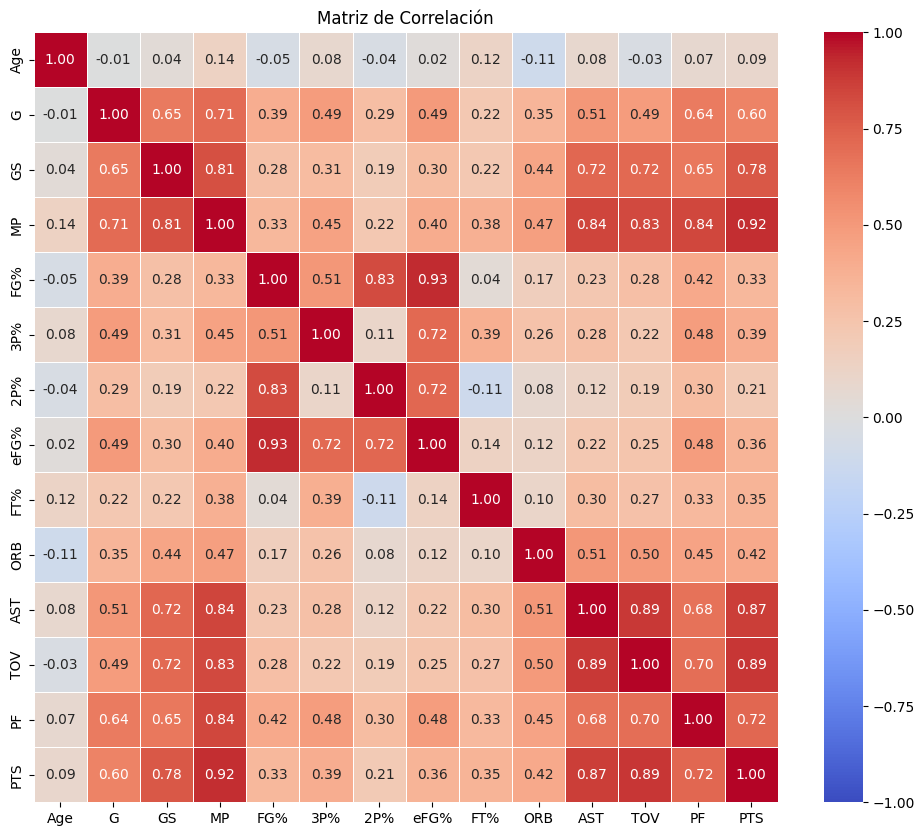

In [5]:
# Se crea la matriz de correlacion para ver que columnas son las mas influyentes sobre la variable de Puntos que es la que nos interesa
corr_matrix = Shooting_guards.corr()

corr_with_survived = corr_matrix['PTS'].sort_values(ascending=False)
print(corr_with_survived)

#Se dibuja el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


C:\Users\ese_1\AppData\Local\Temp\ipykernel_19436\133606111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final['MP'] = pd.to_numeric(Final['MP'])
C:\Users\ese_1\AppData\Local\Temp\ipykernel_19436\133606111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final['PTS'] = pd.to_numeric(Final['PTS'])
C:\Users\ese_1\AppData\Local\Temp\ipykernel_19436\133606111.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

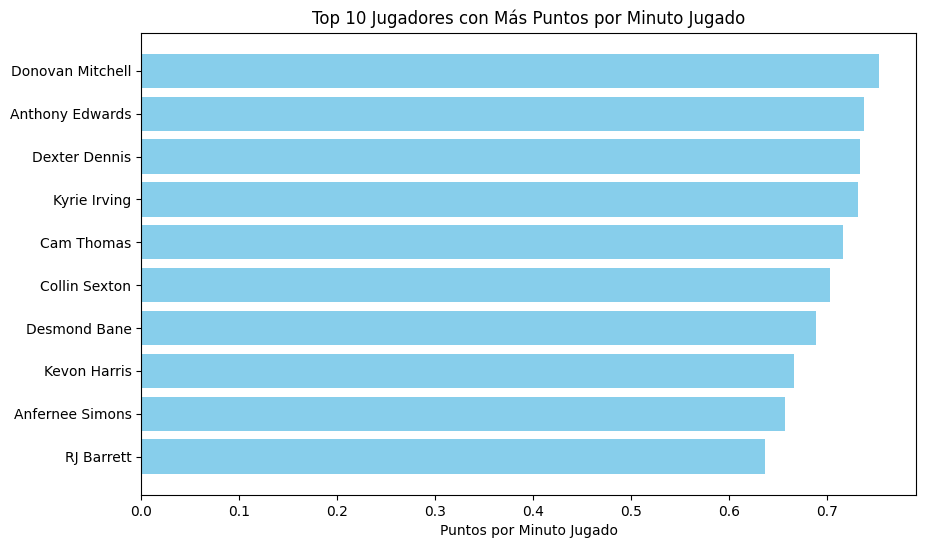

In [9]:
#Vemos que las variables mas influyentes para anotar puntos son MP (minutos jugados), TOV perdidas de balon (extrañamente), Asistencias, Juegos de titular, Faltas personales etc
#Entre las menos influyentes vemos la edad y el porcentaje de tiro de doble.

Final['MP'] = pd.to_numeric(Final['MP'])
Final['PTS'] = pd.to_numeric(Final['PTS'])

Final['PTS/MP'] = Final['PTS'] / Final['MP']

# Ordenando por PTS/MP en orden descendente y seleccionando los top 10
top_10 = Final.sort_values(by='PTS/MP', ascending=False).head(10)

# Graficando
plt.figure(figsize=(10, 6))
plt.barh(top_10['Player'], top_10['PTS/MP'], color='skyblue')
plt.xlabel('Puntos por Minuto Jugado')
plt.title('Top 10 Jugadores con Más Puntos por Minuto Jugado')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el jugador con más puntos esté arriba
plt.show()


Text(0.5, 1.0, 'Minutos Jugados vs Balones Perdidas')

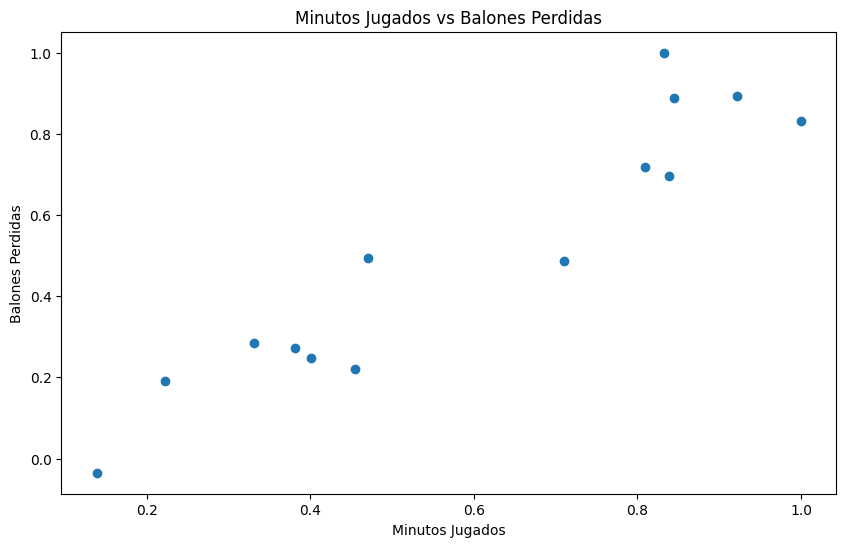

In [23]:
#Parece Haber una relacion Casi Lineal entre Perdidas y Minutos Jugados

x = corr_matrix['MP']
y = corr_matrix['TOV']

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
plt.xlabel('Minutos Jugados')
plt.ylabel('Balones Perdidas')
plt.title('Minutos Jugados vs Balones Perdidas')